In [151]:
import pandas as pd
import os
import glob
from functools import reduce

In [173]:
root_dir = "test"
added_dfs_cortical = []
for root, dir, files in os.walk(root_dir):
    for subdir in dir:
        for file in glob.glob(os.path.join(root, subdir, "*_cortical.csv")):
            df = pd.read_csv(file)
            added_dfs_cortical.append(df)    




In [174]:
for i in added_dfs_cortical:
    i.drop('Values', axis=1, inplace=True)
    i.set_index('Labels', inplace=True)

added_dfs_cortical[0].head()

,Tumor in region
Labels,
void,0.541925
frontal pole,0.094878
insular cortex,0.057726
superior frontal gyrus,0.000000
middle frontal gyrus,0.000000


In [181]:
cort_labels = ["void", "frontal pole", "insular cortex", "superior frontal gyrus", "middle frontal gyrus", "inferior frontal gyrus, pars triangularis", "inferior frontal gyrus, pars opercularis", "precentral gyrus", "temporal pole", "superior temporal gyrus, anterior division", "superior temporal gyrus, posterior division", "middle temporal gyrus, anterior division", "middle temporal gyrus, posterior division", "middle temporal gyrus, temporooccipital part", "inferior temporal gyrus, anterior division", "inferior temporal gyrus, posterior division", "inferior temporal gyrus, temporooccipital part", "postcentral gyrus", "superior parietal lobule", "supramarginal gyrus, anterior division", "supramarginal gyrus, posterior division", "angular gyrus", "lateral occipital cortex, superior division", "lateral occipital cortex, inferior division", "intracalcarine cortex", "frontal medial cortex", "juxtapositional lobule cortex", "subcallosal cortex", "paracingulate gyrus", "cingulate gyrus, anterior division", "cingulate gyrus, posterior division", "precuneous cortex", "cuneal cortex", "frontal oribtal cortex", "parahippocampal gyrus, anterior division", "parahippocampal gyrus, posterior division", "lingual gyrus", "temporal fusiform cortex, anterior division", "temporal fusiform cortex, posterior division", "temporal occipital fusiform cortex", "occipital fusiform gyrus", "frontal operculum cortex", "central opercular cortex", "parietal operculum cortex", "planum polare", "heschls gyrus", "planum temporale", "supracalcarine cortex", "occipital pole"]
sub_labels = ["void", "left cerebral white matter", "left cerebral cortex", "left lateral ventrical", "left thalamus", "left caudate", "left putamen", "left pallidum", "brain-stem", "left hippocampus", "left amygdala", "left accumbens", "right cerebral white matter", "right cerebral cortex", "right lateral ventricle", "right thalamus", "right caudate", "right putamen", "right pallidum", "right hippocampus", "right amygdala", "right accumbens"]

cort_values = [0 for _ in range(len(cort_labels))]
sub_values = [0 for _ in range(len(sub_labels))]

cort_dict = {
    "Labels": cort_labels,
    "Tumor in region": cort_values
}

sub_dict = {
    "Labels": sub_labels,
    "Tumor in region": sub_values
}

cort_df = pd.DataFrame(cort_dict, index=cort_labels)
sub_df = pd.DataFrame(sub_dict, index=sub_labels)
 
cort_df = cort_df.drop(columns=['Labels'])
sub_df = sub_df.drop(columns=['Labels'])


import random

x = random.randint(0, 100)
y = random.randint(0, 100)

merged_df =  reduce(lambda  left,right: pd.merge(left,right,on=['Labels'], how='outer', suffixes=(None, x)), added_dfs_cortical)

summed_df = merged_df.sum(axis=1)

divided_df = summed_df / len(added_dfs_cortical)

divided_df = pd.DataFrame(divided_df, columns=['Tumor in region'])

divided_df.head(100)

,Tumor in region
Labels,
angular gyrus,0.004554
central opercular cortex,0.005791
"cingulate gyrus, anterior division",0.019649
"cingulate gyrus, posterior division",0.003593
cuneal cortex,0.001665
frontal medial cortex,0.020823
frontal operculum cortex,0.009855
frontal oribtal cortex,0.101564
frontal pole,0.073569


In [141]:
df = None
for index in range(len(added_dfs_cortical)):
    df = pd.merge()

print(df)


TypeError: Can only merge Series or DataFrame objects, a <class 'NoneType'> was passed

In [227]:
df_cortical_BRATS = pd.read_csv("cortical_stats_for_BRATS.csv", index_col=0)
df_subcortical_BRATS = pd.read_csv("subcortical_stats_for_BRATS.csv", index_col=0)

print(df_cortical_BRATS.head())


                        Tumor in region
Labels                                 
void                           0.524408
frontal pole                   0.027257
insular cortex                 0.022452
superior frontal gyrus         0.014676
middle frontal gyrus           0.017785


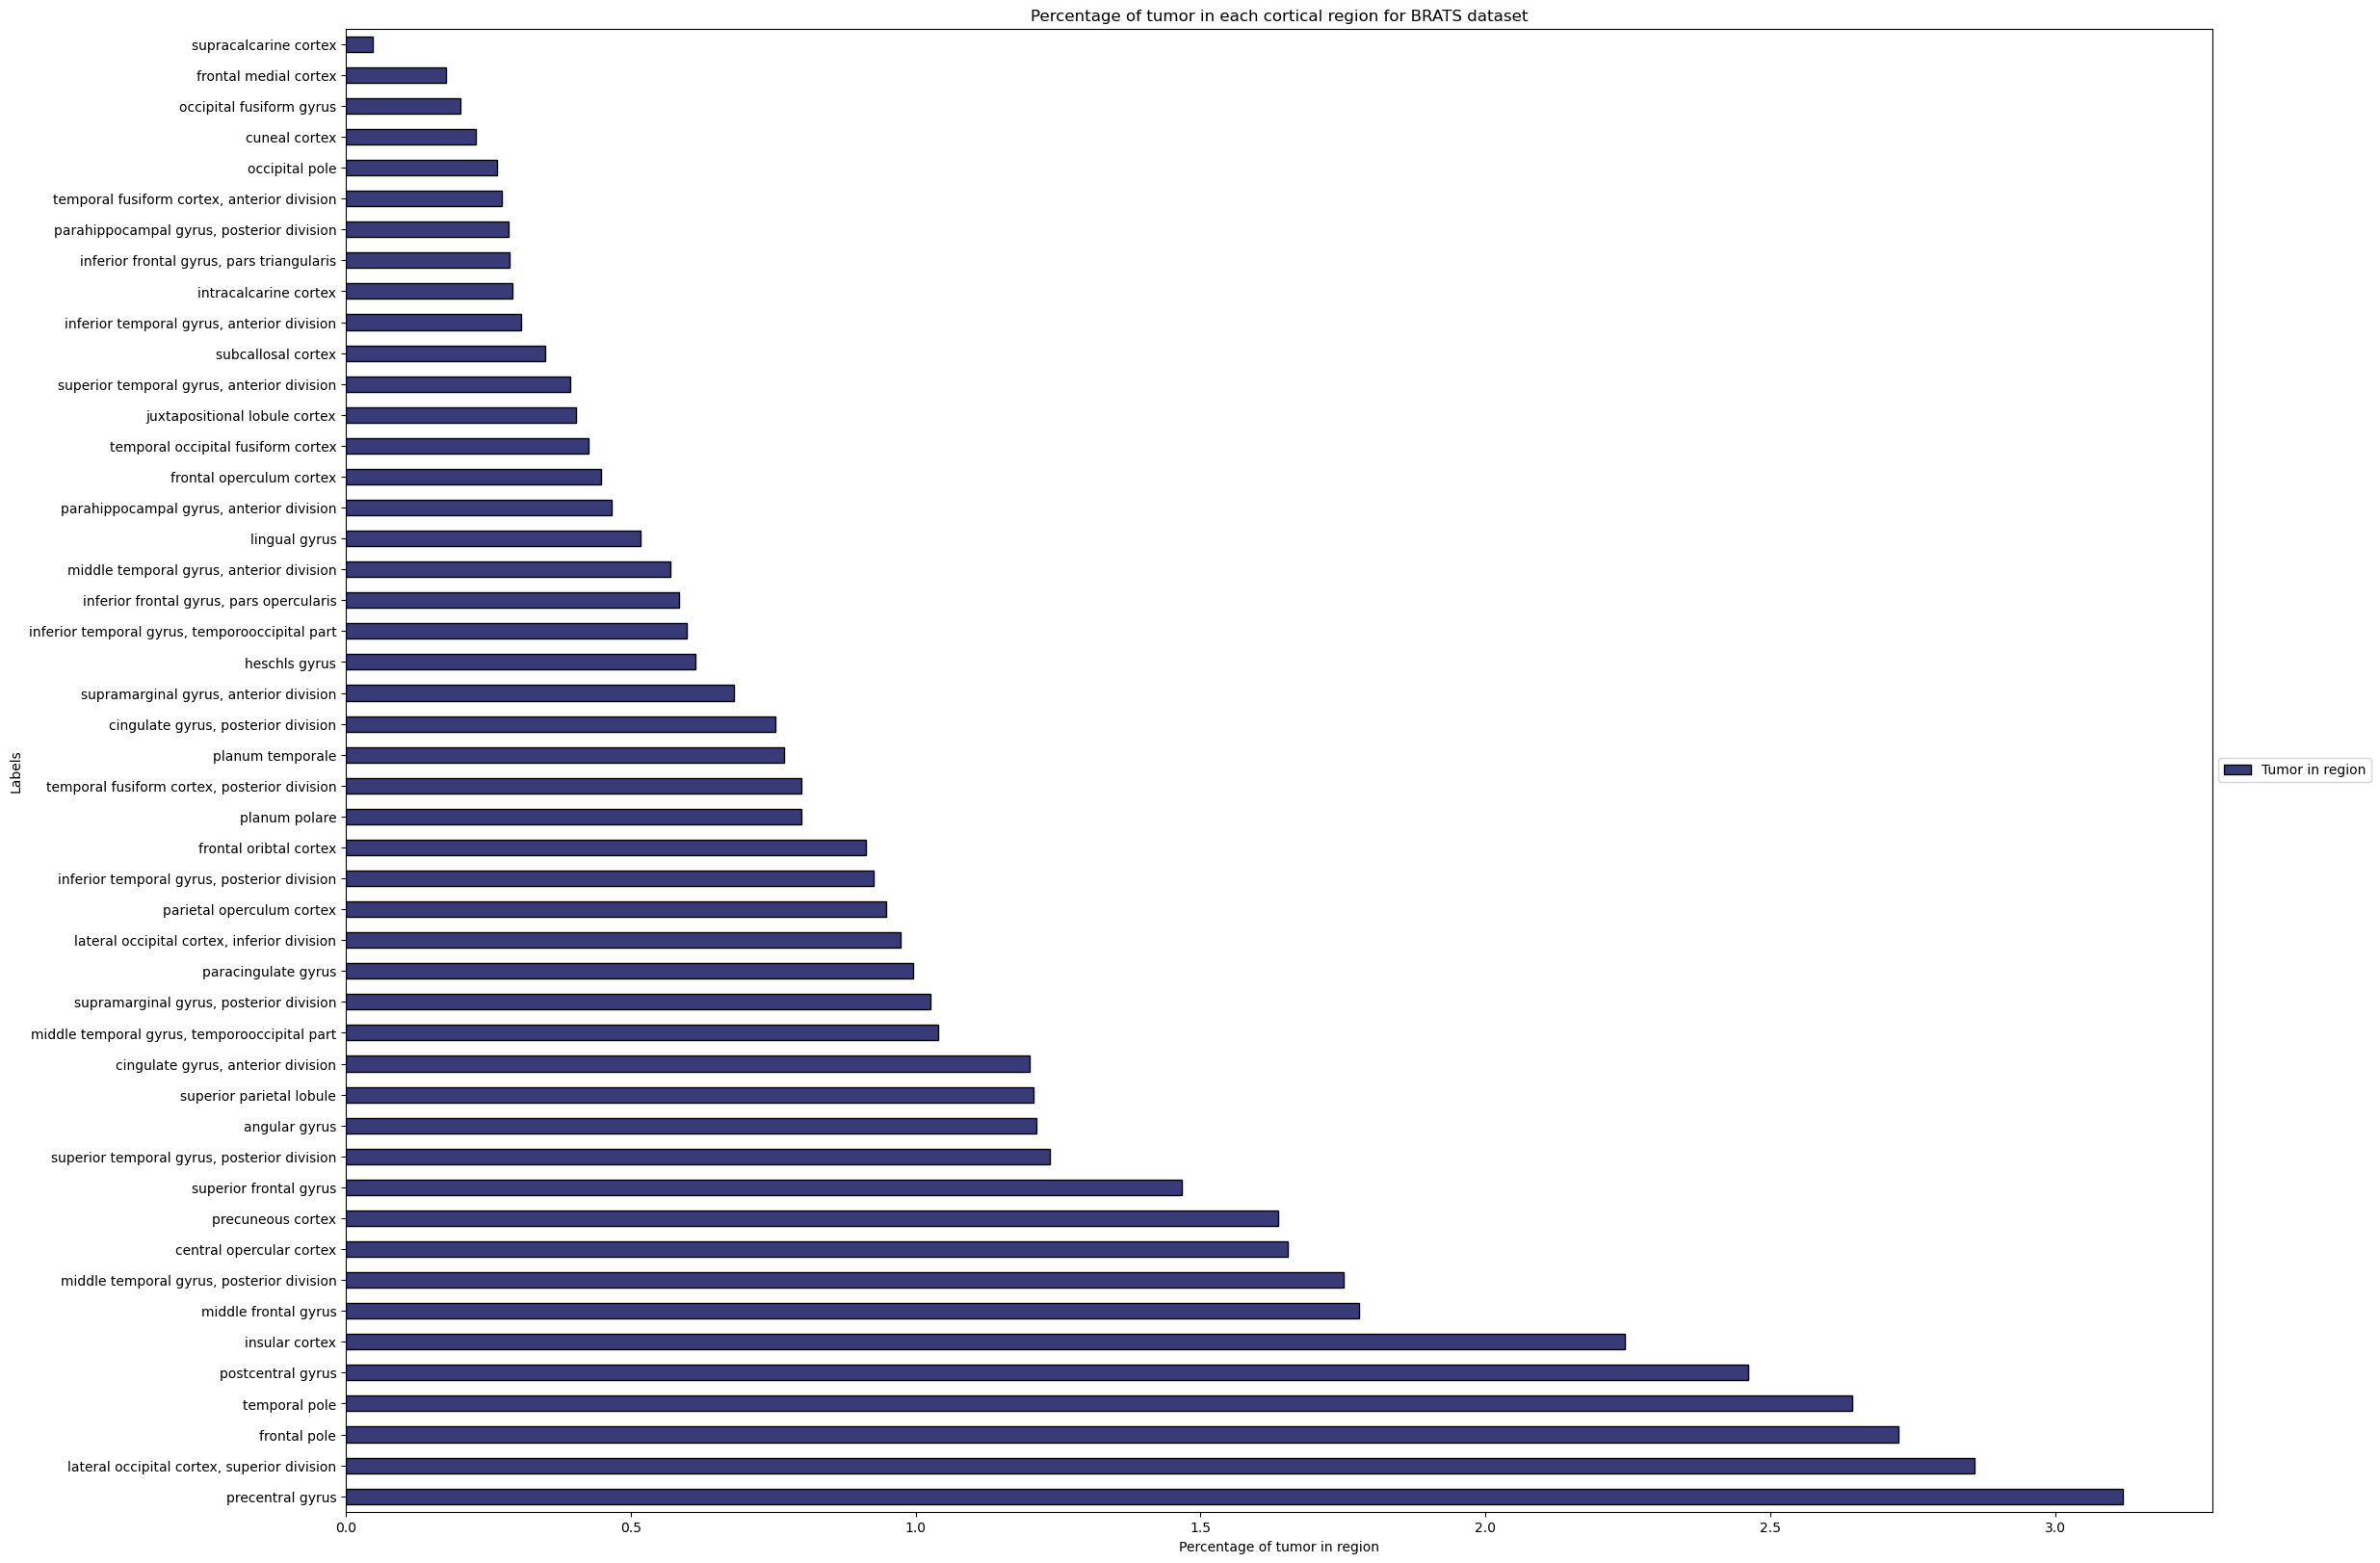

In [228]:
# Bar plot for BRATS data

import matplotlib.pyplot as plt

# Pivot wide
# df_cortical_BRATS_pivot = df_cortical_BRATS.pivot_table(columns='Labels', values='Tumor in region').sort_values(by='Tumor in region', axis=1)

df_cortical_BRATS = df_cortical_BRATS.drop('void')
df_cortical_BRATS = df_cortical_BRATS * 100
df_cortical_BRATS_sorted = df_cortical_BRATS.sort_values(by='Tumor in region', axis=0, ascending=False)

df_cortical_BRATS_sorted.plot(kind='barh', figsize=(25, 20), edgecolor='black', colormap='tab20b')
plt.xlabel('Percentage of tumor in region')
plt.title('Percentage of tumor in each cortical region for BRATS dataset')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))



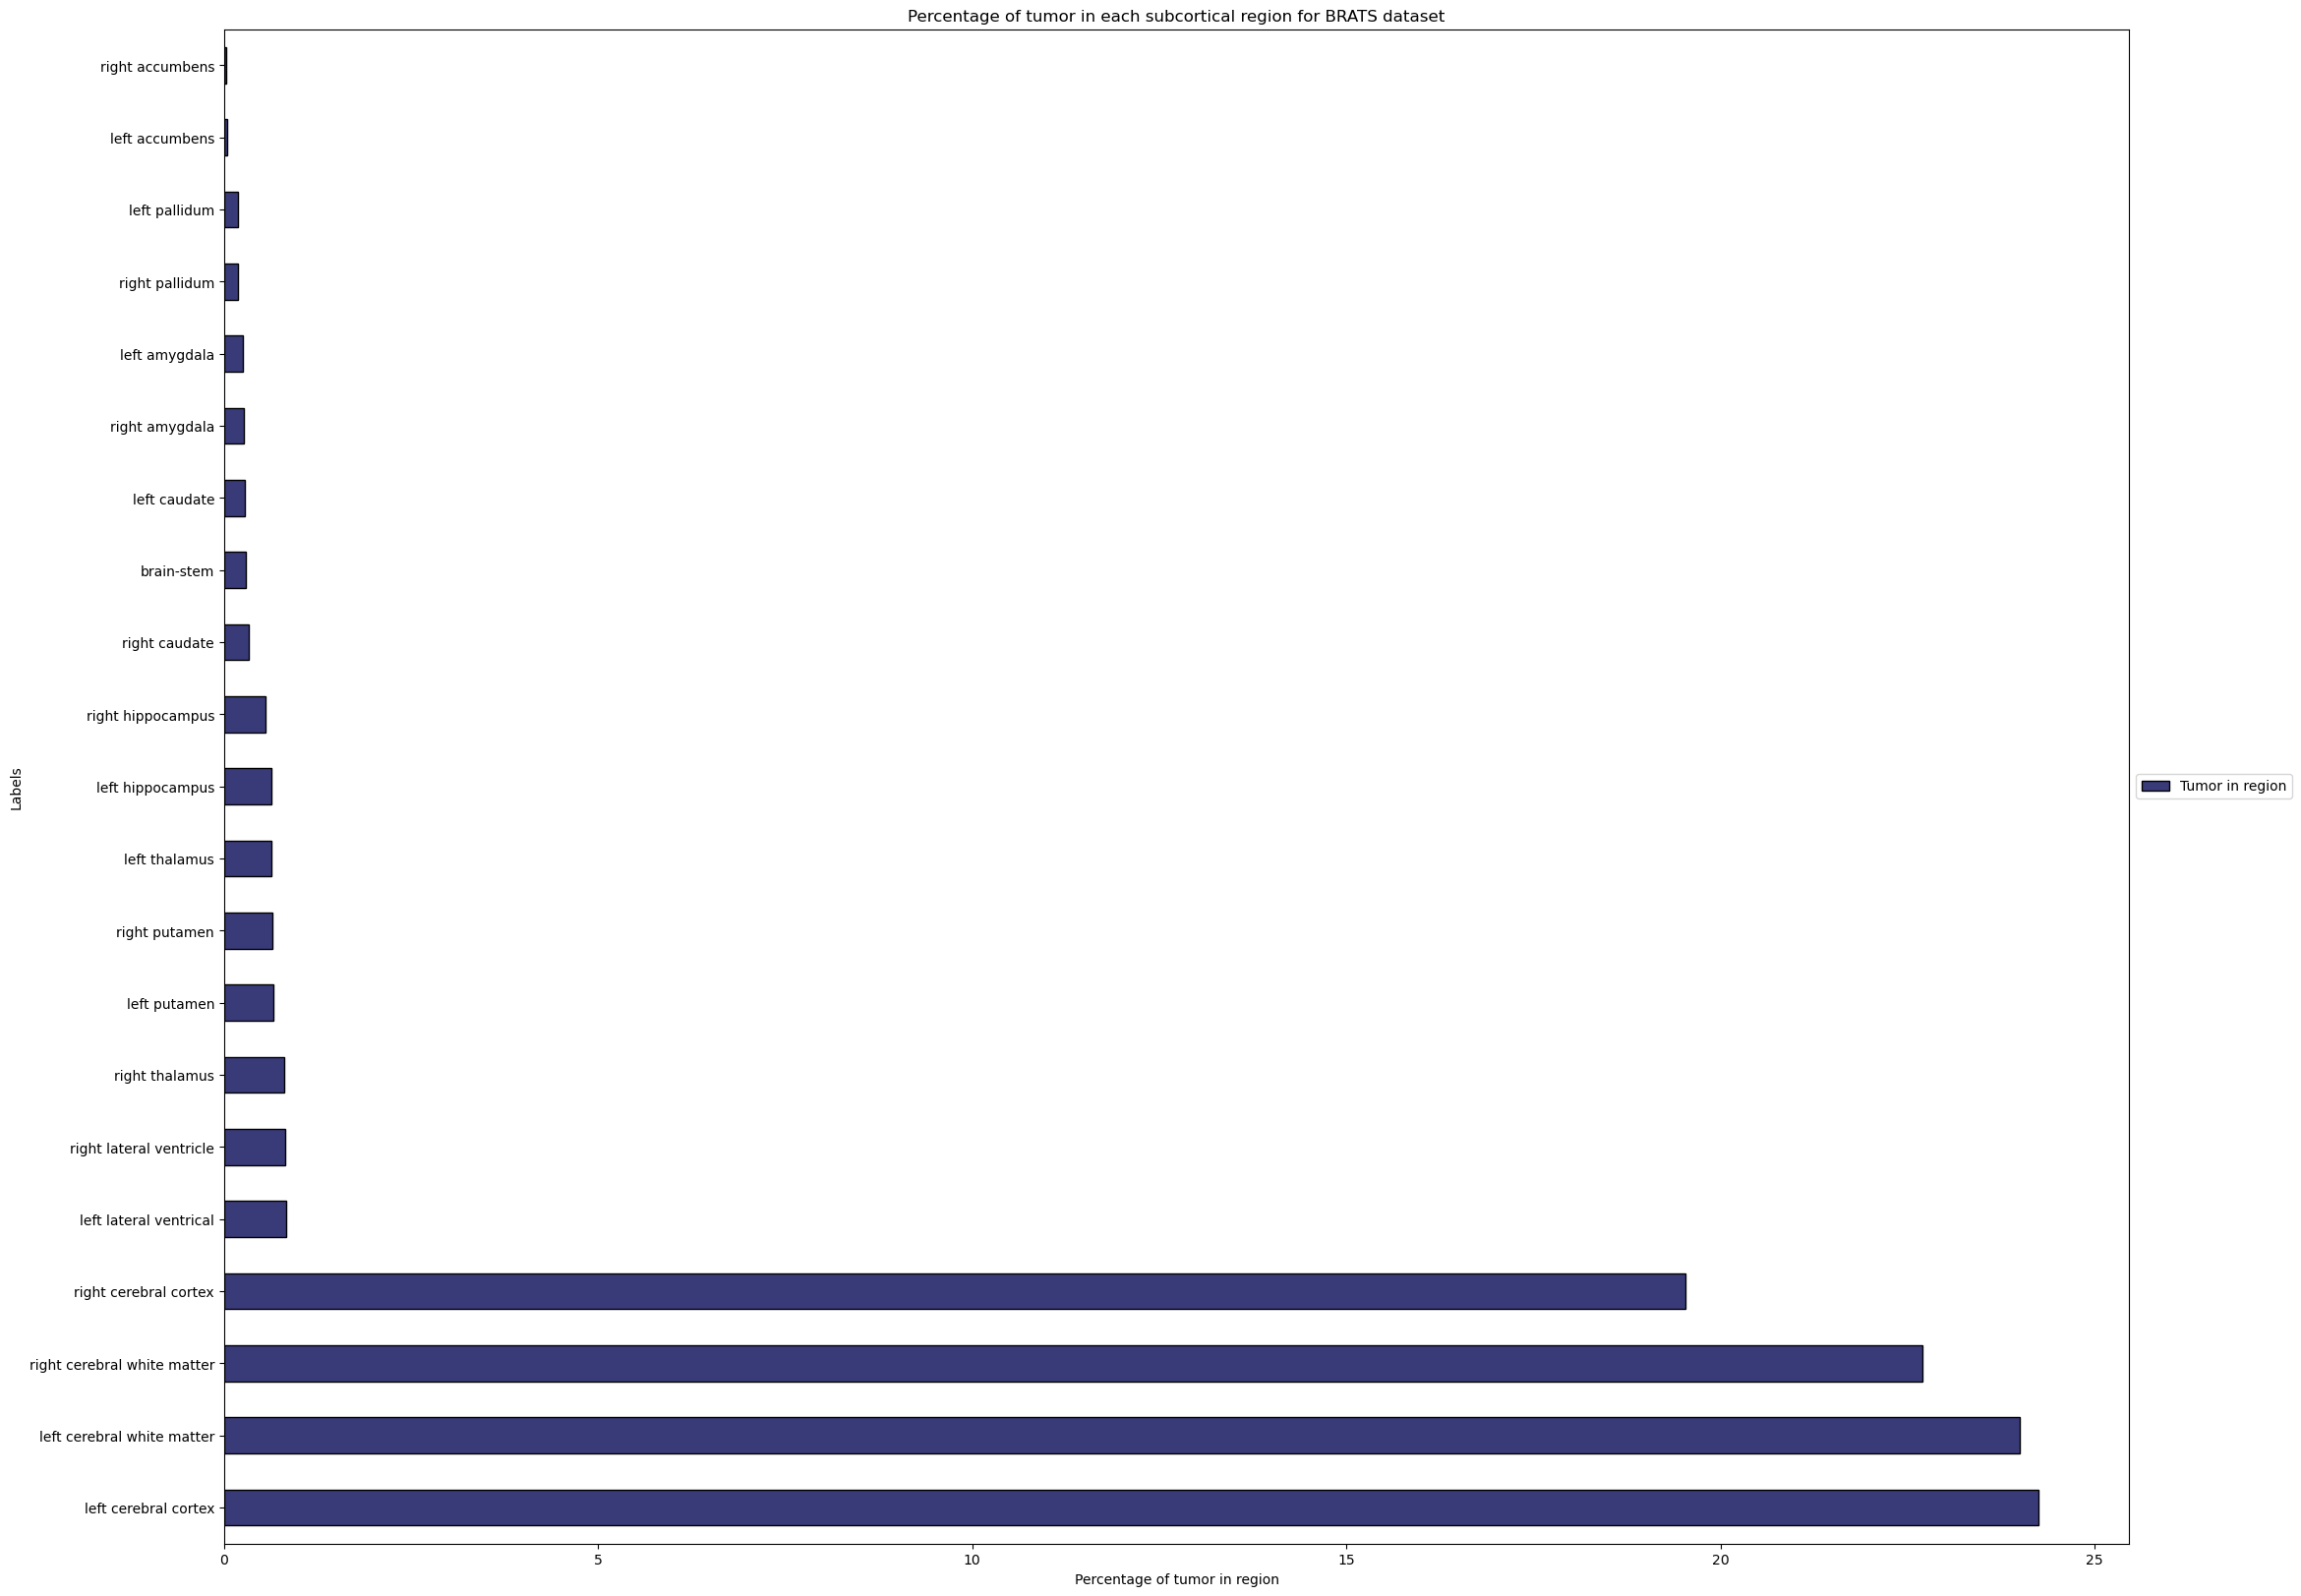

In [225]:
df_subcortical_BRATS = df_subcortical_BRATS.drop('void')
df_subcortical_BRATS = df_subcortical_BRATS * 100
df_subcortical_BRATS_sorted = df_subcortical_BRATS.sort_values(by='Tumor in region', axis=0, ascending=False)

df_subcortical_BRATS_sorted.plot(kind='barh', figsize=(25, 20), edgecolor='black', colormap='tab20b')
plt.xlabel('Percentage of tumor in region')
plt.title('Percentage of tumor in each subcortical region for BRATS dataset')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))